In [1]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

import abtem
import ase
import matplotlib.pyplot as plt
from ase.io import read

(examples:ped_quickstart)=
# PED quickstart

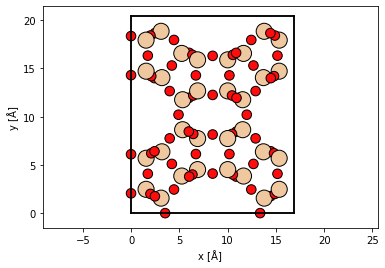

In [2]:
atoms = read("../../data/SiO2_zeolite.cif")

cell = atoms.cell.copy()

atoms *= (1,1,5)

abtem.show_atoms(atoms, plane="xy");

In [28]:
frozen_phonons = abtem.FrozenPhonons(atoms, 1, sigmas= 0.078)

In [29]:
potential = abtem.Potential(
    frozen_phonons,
    gpts=768,
    projection="infinite",
    slice_thickness=2,
    #exit_planes=10,
)

In [30]:
wave = abtem.PlaneWave(energy=100e3)
wave.grid.match(potential)

In [35]:
import numpy as np

def precession_tilts(precession_angle, num_samples, min_azimuth=0., max_azimuth=2 * np.pi, endpoint=False):

    azimuthal_angles = np.linspace(min_azimuth, max_azimuth, num=num_samples, endpoint=endpoint)
    
    tilt_x = precession_angle * np.cos(azimuthal_angles)
    tilt_y = precession_angle * np.sin(azimuthal_angles)
    
    return np.array([tilt_x, tilt_y], dtype=float).T
    

wave.tilt = precession_tilts(100, 10)

#wave.transforms.wave_transforms.wave_transforms

#wave._named_transforms

#wave.ensemble_shape


#wave.build().axes_metadata[0].values


#wave._tilt.wave_transforms[0].tilt

In [49]:
measurement = wave.multislice(potential).diffraction_patterns(max_angle=15, block_direct=True).mean(0)

measurement.compute()

[########################################] | 100% Completed | 5.45 sms


(<Figure size 432x288 with 2 Axes>,
 <Axes: xlabel='kx [1 / Å]', ylabel='ky [1 / Å]'>)

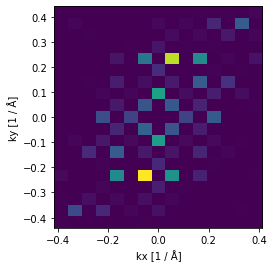

In [50]:
measurement[4].show()

In [51]:
spots = measurement[4].index_diffraction_spots(cell=cell).remove_low_intensity(.05)

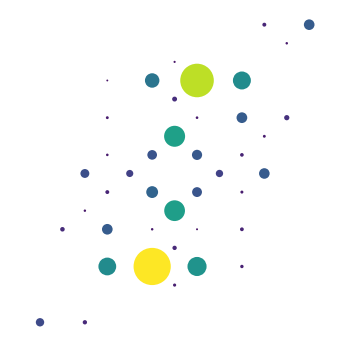

In [52]:
fig, ax = spots.show(spot_scale=1, overlay_indices=False)
ax.axis("off")
plt.savefig("../thumbnails/ped_quickstart.png", bbox_inches="tight", pad_inches=0)